In [26]:
FILE="crypto-microbench.txt"

data = {}

with open(FILE, "r") as f:
    for line in f:
        words = line.split()
        key = words[0].split("/")
        dkey = key[0]
        n = int(key[1])
        # n = line.split("/")
        # key = n[0].strip()
        if dkey not in data.keys():
            data[dkey] = {}
        # num = n[1].split(r" *")
        if words[2] == "ms":
            data[dkey][n] = float(words[1])*(10**-3)
        elif words[2] == "us":
            data[dkey][n] = float(words[1])*(10**-6)
        # print(num[1])
    print(data)


{'pvss_generation': {3: 0.006116, 10: 0.020339, 20: 0.041097, 30: 0.061111, 50: 0.1042, 75: 0.15669, 100: 0.20836000000000002}, 'pvss_verification': {3: 0.0082599, 10: 0.027363, 20: 0.055455, 30: 0.082442, 50: 0.13895, 75: 0.20781, 100: 0.27676999999999996}, 'pvss_aggregation': {3: 8.0358e-05, 10: 0.0013311, 20: 0.0058828, 30: 0.013612, 50: 0.039288, 75: 0.091431, 100: 0.16271000000000002}, 'pvss_pverify': {3: 0.009540900000000001, 10: 0.040221, 20: 0.084368, 30: 0.12774, 50: 0.21545, 75: 0.32573, 100: 0.43504000000000004}, 'pvss_decryption': {3: 0.00079234, 10: 0.0007911699999999999, 20: 0.0007888799999999999, 30: 0.00079251, 50: 0.00079433, 75: 0.00079389, 100: 0.00079291}, 'pvss_reconstruction': {3: 0.0021446, 10: 0.0024369, 20: 0.0033338, 30: 0.0039884000000000005, 50: 0.005708, 75: 0.0084192, 100: 0.011291}}


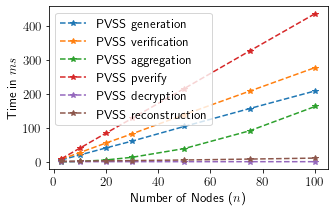

In [32]:
import matplotlib.pyplot as plt

plt.rc('text',usetex=True)

plt.rcParams["figure.figsize"] =(5, 3)
plt.rcParams.update({'font.size': 13})

for key in data:

    x = data[key].keys()
    y = [data[key][j]*1000 for j in x]
    key = key.replace("_", " ")
    key = key.replace("pvss", "PVSS")
    plt.plot(x, y, label=f"{key}", linestyle='--', marker='*')

plt.legend()
# plt.xlim([0,70])

plt.xlabel("Number of Nodes ($n$)")
plt.ylabel("Time in $ms$")
# plt.show()
# plt.xticks(log_points)
plt.savefig(f"../../Overleaf/OptRand/Figures/PVSS-Benchmarks.pdf", bbox_inches='tight')